# Tagged forward protons

In central (semi)exclusive events, scattered protons might remain intact and can be detected by the Precision Proton Spectrometer (PPS). 

In this exercise, we will reconstruct protons selecting central exclusive di-lepton production, $pp\to p\oplus \ell\ell \oplus p$ process with $\ell\in\{ e,\mu \} $. Feinman diagrams of this process are shown below: 

<img src="img/diagrams.png" alt="Feinmann diagrams" style="width: 700px;"/>

By momentum conservation, the 4-momentum of the proton (p) is related to that of the interacting photons ($\gamma$):

\begin{equation}
\begin{split}
P^\text{p}_{initial} &= P^\text{p}_{final} + P^{\gamma} \\
P^{\gamma} &= P^\text{p}_{initial} - P^\text{p}_{final} = P_\text{BEAM} - P^\text{forward-proton}
\end{split}\label{eq:eq0}
\end{equation}

We can define the proton longitudinal momentum loss as:
\begin{equation}
\begin{split}
\xi &= \left| \left( P^\text{p}_{initial} - P^\text{p}_{final} \right) / P^\text{p}_{initial} \right| = \Delta p/E_\text{beam}
\end{split}\label{eq:eqxi}
\end{equation}

Then, the four-momentum of the incoming and outgoing protons (as well as the interacting photon) can be expressed as (note we neglect the proton mass since $E_\text{beam}>>m_p$):

\begin{equation}
\begin{split}
P^\text{p}_{initial} &= \left( E_\text{beam}, 0, 0, \pm E_\text{beam} \right) \\
P^\text{p}_{final} &= \left( (1-\xi)E_\text{beam}, E_\text{beam}\cdot\theta^*_{X}, E_\text{beam}\cdot\theta^*_{Y}, \pm (1-\xi)E_\text{beam} \right) \\
P^{\gamma} &= \left( \xi E_\text{beam}, -E_\text{beam}\cdot\theta^*_{X}, -E_\text{beam}\cdot\theta^*_{Y}, \pm \xi E_\text{beam} \right) 
\end{split}\label{eq:eq4momentum}
\end{equation}

Where $\left(\xi, \theta^*_{X}, \theta^*_{Y}\right)$ are variables measured by the PPS.

The two proton, or two photon (and in case of di-lepton final state - even the two lepton) invariant mass can be calculated from (remember $P_\text{proton1+proton2}=-P_\text{photon1+photon2}=-P_\text{lepton1+lepton2}$):

\begin{equation}
\begin{split}
m^2_{pp} &= \left( P^{\gamma_1} + P^{\gamma_2} \right)^2 \\
 &= | \left( (\xi_1 + \xi_2)E_{beam},0 ,0 ,(\xi_1 - \xi_2)E_{beam} \right) |^2 \\
 &= (\xi_1 + \xi_2)^2 E^2_{beam} - (\xi_1 - \xi_2)^2 E^2_{beam} \\
 &= 4\xi_1\xi_2E^2_{beam} \\
 &= s\xi_1\xi_2
\end{split}\label{eq:invmass}
\end{equation}

Where $\sqrt{s} = \left(2E_\text{beam}\right)$ is the center of mass energy. Then we can express the di-lepton invariant mass and rapidity as:

\begin{equation}
\begin{split}
m_{\ell\ell} &= \sqrt{s\xi_1\xi_2}\\
Y_{\ell\ell} &= \frac{1}{2}\log(\xi_1/\xi_2),
\end{split}\label{eq:eq1}
\end{equation}

We can also reconstruct the proton momentum loss of each proton from the kinematics measured in the central detector ($\xi_\pm$).

In case massless objects, using the following formula:
\begin{equation}
\xi_\pm = \frac{1}{\sqrt{s}}\left[p_T(\ell+)e^{\pm\eta(\ell+)} + p_T(\ell-)e^{\pm\eta(\ell-)}\right] 
\label{eq:eq2}
\end{equation}

or (in case of massive objects):
\begin{equation}
\xi_\pm = \frac{1}{\sqrt{s}}\left[\sum\left(E_i \pm p_{Z,i}\right)\right] 
\label{eq:eq3}
\end{equation}
where $i$ is the index of all outgoing particles

In this exercise, we will study how we can reconstruct protons detected in PPS and thus improve our sensitivity to central (semi)exclusive events.

### The PPS detector

The forward detectors are located ~200m from the CMS detector on both sides. Each detector station (Roman Pot) has a unique identification number `(rpid)`, according to the arm where it is located - positive or negative direction of the beam ($\hat{z}-axis$), and "near" or "far" from the interaction point. Only horizontal stations (those ending in 2 or 3) are used for tracking. The full numbering scheme is shown below:

<img src="img/rp_numbering_scheme_PPSadapted.png" alt="PPS numbers" style="width: 700px;"/>


# From hits in PPS to proton candidates

In `nanoAOD` datasets, you will already find reconstructed `proton` objects. So you can directly compute the invariant mass of the central system and skip straight to the physics. Nevertheless, it is interesting to understand how these objects are constructed.

In the first part of the exercise, we will discuss proton transport and how protons propagate along the beamline under the influence of the LHC magnetic field until they reach PPS.
Beam protons, after participating in diffractive interactions and losing part of their momentum ($\xi$), scatter at small angles ($\theta^*$) and can be displaced from the main beam as they propagate throughout the beamline. A proton propagating through the LHC magnets can be described in a similar way to light travelling through a complex optical system: that is why we call these optical functions.


### Optical functions

The proton position as it reaches PPS can be parameterized using 5 kinematics parameters:
   * ($x^*, y^*$) - coordinates of the interaction point 
   * ($\theta_x^*, \theta_y^*$) - proton scattering angle
   * $\xi$ - proton momentum loss

The transverse position of the proton ($x,y$) as it passes the detector plane in a Roman Pot (RP) is determined by the beam optics, and it is related to proton kinematic parameters:
$$ x = v_x\cdot x^* + L_x\cdot \theta_x^* + D_{x}(\xi)\cdot\xi $$ 
$$ y = v_y\cdot y^* + L_y\cdot \theta_y^* + D_{y}(\xi)\cdot\xi $$ 

Where $D(\xi)$ is the dispersion of the machine, $L$ is the effective length, and $v$ is the magnification parameter.

#### Draw an optical function

Setting a reference frame where the interaction point is at (0,0) and making some approximations, we can write the optical function of dispersion along the x-axis for different proton momentum losses (note that the inverse of this function can be used to translate the x-coordinate of the proton track to the proton's momentum loss): 

$$ x = D_{x}(\xi)\times\xi $$ 

We first need to load a module to help us deal with LHC optical functions. Look at the drawing functions inside using the `help` command and try to guess what they do.

In [1]:
from SimpleLHCPropagator import *

Welcome to JupyROOT 6.28/00


In [2]:
help(SimpleLHCPropagator)

Help on class SimpleLHCPropagator in module SimpleLHCPropagator:

class SimpleLHCPropagator(builtins.object)
 |  SimpleLHCPropagator(files, verbose=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, files, verbose=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  draw_function(self, xangle, rpid, tag)
 |  
 |  draw_function_vs_rpid(self, xangle, tag)
 |  
 |  draw_function_vs_xangle(self, rpid, tag)
 |  
 |  eval(self, rpid, xangle, tag, x)
 |  
 |  get_function(self, xangle, rpid, tag)
 |  
 |  of_tags(self)
 |  
 |  rp_index(self, key)
 |  
 |  set_verbose(self, flag)
 |  
 |  transport(self, rpid, xangle, kinematics)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Now let's load some files containing the optical functions for some of the main crossing angles of the LHC (in $\mu$rad)

The optical functions are usually stored in the PRO POG area, where both calibrated and uncalibrated versions can be found. You don't need these functions in the reconstruction, and they are included in the database and accessed by proton reconstruction algorithms. 

In [3]:
files = {
    135: "/eos/cms/store/group/phys_pps/reconstruction/optical_functions/2023/version_2/135.000urad_calib.root",
    145: "/eos/cms/store/group/phys_pps/reconstruction/optical_functions/2023/version_2/144.974urad_calib.root",
    160: "/eos/cms/store/group/phys_pps/reconstruction/optical_functions/2023/version_2/160.000urad_calib.root"
}

proton_transport = SimpleLHCPropagator( files )

Accessing optical functions for crossing angle 135
Accessing XRPV_C6L5_B2/g_x_D_vs_xi
Accessing XRPV_C6L5_B2/g_v_x_vs_xi
Accessing XRPV_C6L5_B2/g_L_x_vs_xi
Accessing XRPV_C6L5_B2/g_y_D_vs_xi
Accessing XRPV_C6L5_B2/g_v_y_vs_xi
Accessing XRPV_C6L5_B2/g_L_y_vs_xi
Accessing XRPV_C6L5_B2/g_x_D_vs_xi
Accessing XRPV_C6L5_B2/g_v_x_vs_xi
Accessing XRPV_C6L5_B2/g_L_x_vs_xi
Accessing XRPV_C6L5_B2/g_y_D_vs_xi
Accessing XRPV_C6L5_B2/g_v_y_vs_xi
Accessing XRPV_C6L5_B2/g_L_y_vs_xi
Accessing XRPH_D6L5_B2/g_x_D_vs_xi
Accessing XRPH_D6L5_B2/g_v_x_vs_xi
Accessing XRPH_D6L5_B2/g_L_x_vs_xi
Accessing XRPH_D6L5_B2/g_y_D_vs_xi
Accessing XRPH_D6L5_B2/g_v_y_vs_xi
Accessing XRPH_D6L5_B2/g_L_y_vs_xi
Accessing XRPV_D6L5_B2/g_x_D_vs_xi
Accessing XRPV_D6L5_B2/g_v_x_vs_xi
Accessing XRPV_D6L5_B2/g_L_x_vs_xi
Accessing XRPV_D6L5_B2/g_y_D_vs_xi
Accessing XRPV_D6L5_B2/g_v_y_vs_xi
Accessing XRPV_D6L5_B2/g_L_y_vs_xi
Accessing XRPV_D6L5_B2/g_x_D_vs_xi
Accessing XRPV_D6L5_B2/g_v_x_vs_xi
Accessing XRPV_D6L5_B2/g_L_x_vs_xi
Acce

Accessing XRPH_D6R5_B1/g_x_D_vs_xi
Accessing XRPH_D6R5_B1/g_v_x_vs_xi
Accessing XRPH_D6R5_B1/g_L_x_vs_xi
Accessing XRPH_D6R5_B1/g_y_D_vs_xi
Accessing XRPH_D6R5_B1/g_v_y_vs_xi
Accessing XRPH_D6R5_B1/g_L_y_vs_xi
Accessing XRPH_B6R5_B1/g_x_D_vs_xi
Accessing XRPH_B6R5_B1/g_v_x_vs_xi
Accessing XRPH_B6R5_B1/g_L_x_vs_xi
Accessing XRPH_B6R5_B1/g_y_D_vs_xi
Accessing XRPH_B6R5_B1/g_v_y_vs_xi
Accessing XRPH_B6R5_B1/g_L_y_vs_xi
Accessing XRPV_B6R5_B1/g_x_D_vs_xi
Accessing XRPV_B6R5_B1/g_v_x_vs_xi
Accessing XRPV_B6R5_B1/g_L_x_vs_xi
Accessing XRPV_B6R5_B1/g_y_D_vs_xi
Accessing XRPV_B6R5_B1/g_v_y_vs_xi
Accessing XRPV_B6R5_B1/g_L_y_vs_xi
Accessing XRPV_B6R5_B1/g_x_D_vs_xi
Accessing XRPV_B6R5_B1/g_v_x_vs_xi
Accessing XRPV_B6R5_B1/g_L_x_vs_xi
Accessing XRPV_B6R5_B1/g_y_D_vs_xi
Accessing XRPV_B6R5_B1/g_v_y_vs_xi
Accessing XRPV_B6R5_B1/g_L_y_vs_xi
Accessing optical functions for crossing angle 160
Accessing XRPV_C6L5_B2/g_x_D_vs_xi
Accessing XRPV_C6L5_B2/g_v_x_vs_xi
Accessing XRPV_C6L5_B2/g_L_x_vs_xi
Acce

We can draw the displacement $x_D$ in the PPS detector station, as a function of $\xi$, for a given crossing angle and detector station.

Tags: ('x_D', 'v_x', 'L_x', 'y_D', 'v_y', 'L_y')


(<cppyy.gbl.TSpline3 object at 0x113d8150>,
 <cppyy.gbl.TCanvas object at 0x11898fe0>)

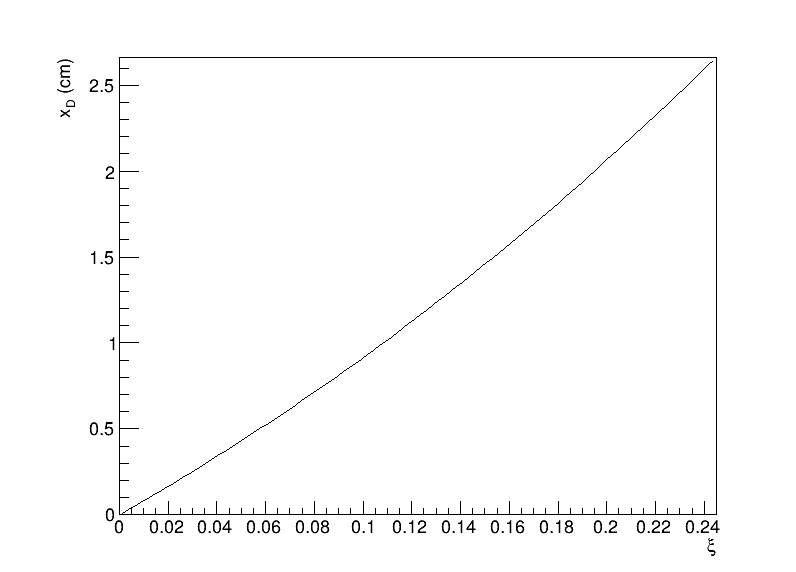

In [4]:
print ( "Tags:", proton_transport.of_tags() )

proton_transport.draw_function( 135, 23, "x_D" )

**QUESTION:** Does this function depend on the crossing angle and RP station? Is it the same for both PPS arms?

**Hint:** You can draw $x_D$ vs. $\xi$ for the different crossing angles, and different Roman Pot stations, using the functions `draw_function_vs_xangle` and `draw_function_vs_rpid`.

In [5]:
#GIVE IT A TRY HERE

### Access proton data

Let's look at some data from 2017. First, we will use a data file from the storage and prepare a pandas dataframe. We will use the [h5 file format](https://docs.h5py.org/en/stable/quick.html#core-concepts), but in principle the same can be done from a `ROOT` file.

In [6]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm

DATAPATH="/eos/home-c/cmsdas/2024/short-ex-pro/data/"
fileNames_data = [
    DATAPATH+'/output-UL2017B-PreSel.h5',
    DATAPATH+'/output-UL2017C1-PreSel.h5',
    DATAPATH+'/output-UL2017E-PreSel.h5',
    DATAPATH+'/output-UL2017F1-PreSel.h5'
]

df_data_list = []
df_counts_data_list = []

for file_ in fileNames_data:
    print ( file_ )
    with h5py.File( file_, 'r' ) as f:    
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
    
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )  
        
        dset_counts = f['event_counts']
        df_counts_data_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_data_list[-1] )
    
        chunk_size = 1000000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_ = pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str )
            df_ = df_[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
                        'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                        'Xi', 'T', 'ThX', 'ThY',
                        'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
            df_data_list.append( df_ )
            print ( df_data_list[-1].head() )
            print ( len( df_data_list[-1] ) )
            
print ( "Concatenating {} dataframes..".format( len( df_data_list ) ) )
df_data = pd.concat( df_data_list )
print ( "Total length: {} lines".format( len( df_data ) ) )
df_data[:20]

/eos/home-c/cmsdas/2024/short-ex-pro/data//output-UL2017B-PreSel.h5
['columns', 'event_counts', 'protons', 'selections']
(107075, 38)
[[2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 ...
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP

      Run  LumiSection    EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
0  303885         1645  2018875648          120.0        0 -999     23     -1   
1  303885         1645  2018875648          120.0        0 -999     23     -1   
2  303885         1645  2018875648          120.0        0 -999    103     -1   
3  303885         1645  2018875648          120.0        0 -999    123     -1   
4  303885         1645  2018875648          120.0        1    1    103    123   

     TrackX1   TrackY1  ...         T       ThX       ThY    Muon0Pt  \
0   5.778259  0.799988  ... -0.117099  0.000000 -0.000053  57.697025   
1  10.239502  3.560547  ... -0.429636  0.000000 -0.000105  57.697025   
2  13.557129  4.715820  ... -0.188896  0.000000 -0.000068  57.697025   
3  13.593994  4.991699  ... -0.185276  0.000000 -0.000067  57.697025   
4  13.557129  4.715820  ... -0.083304  0.000039  0.000016  57.697025   

     Muon1Pt     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  5

Run  LumiSection  EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
0   297227           53  36577200          120.0        0 -999    123     -1   
1   297227           55  38079656          120.0        0 -999    103     -1   
2   297227           55  38079656          120.0        0 -999    123     -1   
3   297227           55  38079656          120.0        1    1    103    123   
4   297227           56  38791640          120.0        0 -999    103     -1   
5   297227           56  38791640          120.0        0 -999    123     -1   
6   297227           56  38791640          120.0        1    1    103    123   
7   297227           56  38604580          120.0        0 -999      3     -1   
8   297227           56  38604580          120.0        0 -999     23     -1   
9   297227           56  38604580          120.0        0 -999    103     -1   
10  297227           56  38604580          120.0        0 -999    123     -1   
11  297227           56  38604580          120.0        1    0      3     23   
12  297227           56  38604580          120.0        1    1    103    123   
13  297227           58  40216592          120.0        0 -999    123     -1   
14  297227           58  40216592          120.0        0 -999    123     -1   
15  297227           58  40216592          120.0        0 -999    123     -1   
16  297227           58  40216592          120.0        0 -999    123     -1   
17  297227           58  40216592          120.0        0 -999    123     -1   
18  297227           59  41195312          120.0        0 -999      3     -1   
19  297227           59  41195312          120.0        0 -999     23     -1   

     TrackX1    TrackY1  ...         T       ThX       ThY     Muon0Pt  \
0   2.333649   0.503052  ... -0.659534  0.000000 -0.000127  132.996933   
1   4.577393   1.367676  ... -0.327952  0.000000 -0.000090   63.340645   
2   4.395691   1.493408  ... -0.332531  0.000000 -0.000091   63.340645   
3   4.577393   1.367676  ... -0.160121 -0.000061 -0.000014   63.340645   
4   8.585938   2.644531  ... -0.184990  0.000000 -0.000068   65.270454   
5   8.483521   2.801025  ... -0.181088  0.000000 -0.000067   65.270454   
6   8.585938   2.644531  ... -0.039719 -0.000015  0.000024   65.270454   
7   4.131104   0.797180  ... -0.663142  0.000000 -0.000128   74.027679   
8   4.206665   0.942139  ... -0.536933  0.000000 -0.000115   74.027679   
9   3.514526   1.507568  ... -1.146207  0.000000 -0.000168   74.027679   
10  3.416473   1.723877  ... -1.093628  0.000000 -0.000164   74.027679   
11  4.131104   0.797180  ... -0.315390  0.000015 -0.000087   74.027679   
12  3.514526   1.507568  ... -0.277554 -0.000034 -0.000076   74.027679   
13  3.958282  -2.177979  ... -1.006406  0.000000  0.000158   58.515450   
14  4.077271  -3.800537  ... -2.758699  0.000000  0.000262   58.515450   
15  7.047058   2.301270  ... -0.197758  0.000000 -0.000070   58.515450   
16  8.261963 -10.598633  ... -2.646492  0.000000  0.000263   58.515450   
17  8.795410   3.591309  ... -0.266683  0.000000 -0.000082   58.515450   
18  6.081787   5.660645  ... -6.121355  0.000000 -0.000391   54.019947   
19  3.370850   0.599731  ... -0.693222  0.000000 -0.000130   54.019947   

      Muon1Pt     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0   63.807861   12.129827            48  0.983012    0.056195     0.004091  
1   62.493637  123.616516            27  0.132612    0.001953     0.048346  
2   62.493637  123.616516            27  0.132612    0.001953     0.048346  
3   62.493637  123.616516            27  0.132612    0.001953     0.048346  
4   65.022888  152.786011            29  0.058782    0.002211     0.062855  
5   65.022888  152.786011            29  0.058782    0.002211     0.062855  
6   65.022888  152.786011            29  0.058782    0.002211     0.062855  
7   70.969543   90.916580            28  0.588286    0.003354     0.038210  
8   70.969543   90.916580            28  0.588286    0.003354     0.038210  
9

We will use the `MultiRP` reconstruction method, which selects proton candidates that have a tracks in at least one near AND one far detector station. This is the most reliable algorithm and the one recommended for most analyses. 

Filter the dataframe for events with protons that are reconstructed with the `MultiRP` algorithm, slim the dataframe (select a sub-set of variables) and inspect the dataframe content.

NOTE: In the 2017 configuration, proton reconstruction using the `MultiRP` method can only have 0 or 1 reconstructed protons (events with multiple proton candidates are not reconstructed correctly). Events with $\geq2$ tagged protons in one arm will be counted as 0. 

In [7]:
df_data = df_data[ df_data["MultiRP"] == 1]
df_data = df_data[ df_data["Arm"] >= 0] #Select arm 0 or 1 (-999 is assigned as dummy value)
df_data[:20]

Run  LumiSection  EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
3   297227           55  38079656          120.0        1    1    103    123   
6   297227           56  38791640          120.0        1    1    103    123   
11  297227           56  38604580          120.0        1    0      3     23   
12  297227           56  38604580          120.0        1    1    103    123   
22  297227           59  40601156          120.0        1    0      3     23   
33  297227           70  49904104          120.0        1    0      3     23   
36  297227           70  49482508          120.0        1    1    103    123   
39  297227           71  50687028          120.0        1    0      3     23   
43  297227           73  51787112          120.0        1    1    103    123   
48  297227           73  52238048          120.0        1    1    103    123   
51  297227           74  52411720          120.0        1    1    103    123   
54  297227           74  52460784          120.0        1    1    103    123   
57  297227           75  53687296          120.0        1    1    103    123   
61  297227           75  53449356          120.0        1    0      3     23   
64  297227           75  53886576          120.0        1    0      3     23   
67  297227           76  54400560          120.0        1    0      3     23   
70  297227           76  54126336          120.0        1    1    103    123   
73  297227           78  56185408          120.0        1    1    103    123   
81  297227           81  58284068          120.0        1    1    103    123   
85  297227           85  61573672          120.0        1    0      3     23   

      TrackX1   TrackY1  ...         T       ThX       ThY     Muon0Pt  \
3    4.577393  1.367676  ... -0.160121 -0.000061 -0.000014   63.340645   
6    8.585938  2.644531  ... -0.039719 -0.000015  0.000024   65.270454   
11   4.131104  0.797180  ... -0.315390  0.000015 -0.000087   74.027679   
12   3.514526  1.507568  ... -0.277554 -0.000034 -0.000076   74.027679   
22   3.521118  0.645874  ... -0.687121  0.000058 -0.000116   53.758015   
33   9.614258  1.467651  ... -0.478235  0.000109 -0.000016   60.526527   
36   8.175293  1.603638  ... -0.046286  0.000012  0.000029   88.013977   
39   5.214844 -0.371826  ... -0.817277  0.000107  0.000093  126.357605   
43   4.165283  2.669922  ... -2.175805 -0.000208  0.000130  169.709396   
48   5.372803  0.135132  ... -0.338402  0.000086  0.000031   86.516212   
51   4.895752 -0.607605  ... -1.155988  0.000118  0.000121  111.228539   
54   3.893433  0.505127  ... -0.254717  0.000079 -0.000002   55.571697   
57   8.751953 -1.412354  ... -0.752605  0.000091  0.000104   52.145096   
61  12.326172 -1.268066  ... -0.174950 -0.000013  0.000065   74.069061   
64   6.321533  1.730103  ... -0.278659  0.000046 -0.000069   81.518639   
67   8.904297 -0.764648  ... -0.333506 -0.000041  0.000082  157.484146   
70   3.238647  1.550049  ... -0.425402 -0.000099 -0.000029   75.266441   
73   5.210449 -1.396362  ... -0.591158  0.000035  0.000116   57.649437   
81  11.446289  3.683838  ... -0.922007  0.000148 -0.000045   74.948814   
85   7.032471  0.151062  ... -0.161547  0.000034  0.000053   62.699879   

       Muon1Pt     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
3    62.493637  123.616516            27  0.132612    0.001953     0.048346  
6    65.022888  152.786011            29  0.058782    0.002211     0.062855  
11   70.969543   90.916580            28  0.588286    0.003354     0.038210  
12   70.969543   90.916580            28  0.588286    0.003354     0.038210  
22   50.114189  105.095467            20  0.052973    0.025162     0.002618  
33   53.105831   93.213806            80  0.665581    0.003924     0.027699  
36   52.118660   91.549500            21  0.527584    0.007379     0.015748  
39  113.611771  270.992401            27  0.016921    0.010428     0.041786  
43  123.770248   96.469757            13  0.930855    0.059182     0.

Draw (x,y) proton hits from the data:

Text(0, 0.5, 'Y (mm)')

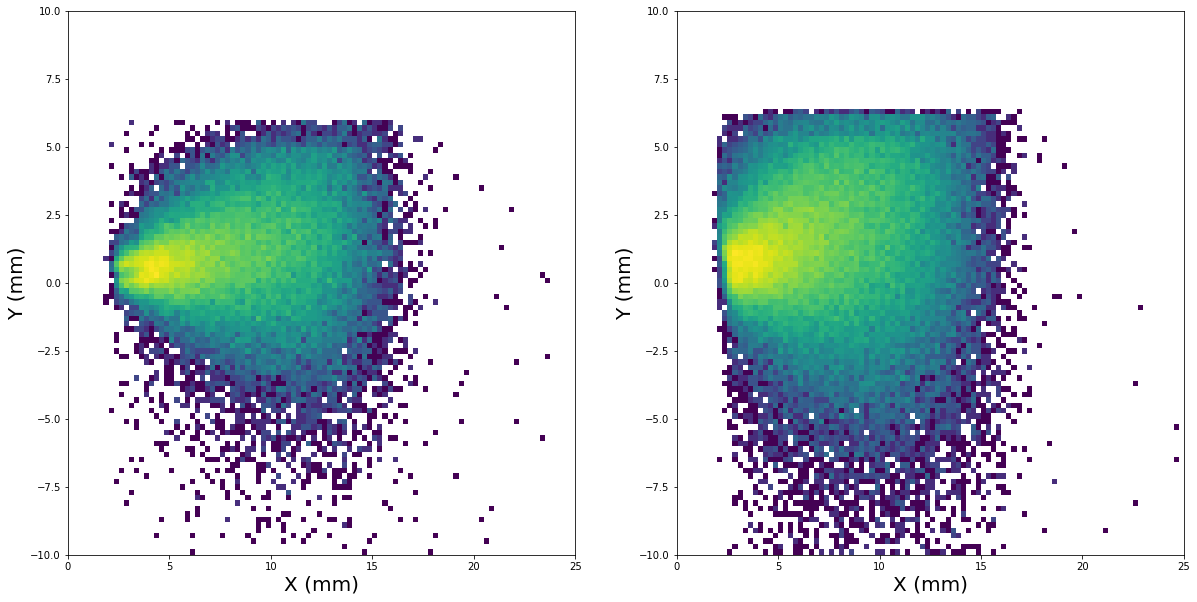

In [8]:
msk_protons_1 = ( df_data["Arm"] == 0 )
msk_protons_2 = ( df_data["Arm"] == 1 )
    
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_data[ "TrackX2" ][ msk_protons_1 ], df_data[ "TrackY2" ][ msk_protons_1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_data[ "TrackX2" ][ msk_protons_2 ], df_data[ "TrackY2" ][ msk_protons_2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

Look at these distributions. 

**QUESTION:** What do you conclude from the shape of the distribution? Looking at the $\xi$ plots from earlier, what do you think the $\xi$ acceptance is approximately, for each arm? How much is this in terms of invariant mass of the central system? Could we detect exclusive Higgs production, with the current detectors?

**Hint:** Take another look at the equations from the beggining.

Now verify your assumptions by plotting the $\xi$ distribution on both arms.

In [9]:
##WRITE YOUR CODE TO PLOT THE XI DISTRIBUTION HERE##

### Access exclusive di-lepton signal

Now we take a look at some simulated exclusive di-muon events. 

In [10]:
fileName_signal = "/eos/home-c/cmsdas/2024/short-ex-pro/data/output-MC2017-Elastic-Non3+3-PreSel.h5"

In [11]:
df_signal = None
event_counts_signal = None
selections_str_signal = None

with h5py.File( fileName_signal, 'r' ) as f:
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts_signal = list( dset_counts )
    print ( event_counts_signal )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str_signal = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str_signal )
    
    df_signal = pd.DataFrame( dset, columns=columns_str )
    
    df_signal = df_signal[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
                            'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                            'Xi', 'T', 'ThX', 'ThY',
                            'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
    

['columns', 'event_counts', 'protons', 'selections']
(213536, 38)
[[1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 9.1376482e-04
  2.3529863e-02 4.4119707e-03]
 [1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 8.7998388e-04
  4.5879604e-03 8.1510313e-02]
 [1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 8.7998388e-04
  4.5879604e-03 8.1510313e-02]
 ...
 [1.0000000e+00 7.5600000e+02 4.2949673e+09 ... 2.6697566e-04
  2.1097749e-03 4.5376737e-02]
 [1.0000000e+00 7.5600000e+02 4.2949673e+09 ... 1.8521260e-04
  3.6291495e-02 3.0596652e-03]
 [1.0000000e+00 7.5600000e+02 4.2949673e+09 ... 1.8521260e-04
  3.6291495e-02 3.0596652e-03]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muo

In [12]:
df_signal[:20]

Run  LumiSection  EventNum  CrossingAngle  MultiRP  Arm  RPId1  RPId2  \
0     1            1         5          150.0        0 -999     23     -1   
1     1            1         3          150.0        0 -999    103     -1   
2     1            1         3          150.0        0 -999    123     -1   
3     1            1         3          150.0        1    1    103    123   
4     1            1        12          150.0        0 -999      3     -1   
5     1            1        12          150.0        0 -999     23     -1   
6     1            1        12          150.0        1    0      3     23   
7     1            1        15          150.0        0 -999    103     -1   
8     1            1        15          150.0        0 -999    123     -1   
9     1            1        10          150.0        0 -999      3     -1   
10    1            1        10          150.0        0 -999     23     -1   
11    1            1        16          150.0        0 -999      3     -1   
12    1            1        16          150.0        0 -999     23     -1   
13    1            1        14          150.0        0 -999     23     -1   
14    1            1        17          150.0        0 -999    103     -1   
15    1            1        17          150.0        0 -999    123     -1   
16    1            1        17          150.0        1    1    103    123   
17    1            1        30          150.0        0 -999      3     -1   
18    1            1        30          150.0        0 -999     23     -1   
19    1            1        30          150.0        1    0      3     23   

     TrackX1   TrackY1  ...           T       ThX       ThY     Muon0Pt  \
0   2.218964  0.249985  ...   -1.530517  0.000000 -0.000193   63.039753   
1   7.630859  1.224731  ...   -0.039389  0.000000 -0.000027  115.289131   
2   7.794434  1.300049  ...   -0.037168  0.000000 -0.000026  115.289131   
3   7.630859  1.224731  ...   -0.432312  0.000102  0.000023  115.289131   
4   5.149414  0.725220  ...   -0.107853  0.000000 -0.000051   55.317619   
5   5.103577  0.700012  ...   -0.080861  0.000000 -0.000044   55.317619   
6   5.149414  0.725220  ...   -0.058947 -0.000036  0.000011   55.317619   
7   4.258057  2.774658  ...   -0.781266  0.000000 -0.000140   89.590111   
8   4.074829  3.050049  ...   -0.817653  0.000000 -0.000143   89.590111   
9   3.106201  0.438080  ...   -0.467230  0.000000 -0.000107   62.715733   
10  3.281708  0.399994  ...   -0.148356  0.000000 -0.000060   62.715733   
11  3.081665  0.613220  ...   -0.970970  0.000000 -0.000154   68.071739   
12  3.129883  0.700012  ...   -0.577651  0.000000 -0.000119   68.071739   
13  1.991241  0.299988  ... -167.529572  0.000000 -0.002013   64.988419   
14  3.828247  0.749878  ...   -0.084279  0.000000 -0.000045   61.452324   
15  3.847076  0.799988  ...   -0.070167  0.000000 -0.000041   61.452324   
16  3.828247  0.749878  ...   -0.055676  0.000035  0.000012   61.452324   
17  5.139893  0.158340  ...   -0.007713  0.000000 -0.000011   52.522842   
18  5.331299  0.049999  ...   -0.003168  0.000000 -0.000003   52.522842   
19  5.139893  0.158340  ...   -0.359350  0.000076  0.000055   52.522842   

       Muon1Pt     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0    62.647861  132.454605            34  0.000914    0.023530     0.004412  
1   114.552933  251.395355            16  0.000880    0.004588     0.081510  
2   114.552933  251.395355            16  0.000880    0.004588     0.081510  
3   114.552933  251.395355            16  0.000880    0.004588     0.081510  
4    52.814793  126.690613             4  0.001160    0.055618     0.001708  
5    52.814793  126.690613             4  0.001160    0.055618     0.001708  
6    52.814793  126.690613             4  0.001160    0.055618     0.001708  
7    88.274399  195.115387            10  0.000011    0.003281     0.068651  
8    88.274399  195.115387            10  0.000011    0.003281     0.068651  
9    61.223686  180.117294    

In [13]:
df_counts_signal = pd.Series( event_counts_signal, index=selections_str_signal );
df_counts_signal

All        178402
Muon       166756
Vertex     149608
Protons     91429
dtype: int64

Think about the kinematics of an exclusive dilepton event. Two photons interact to form a pair of leptons and... nothing else. So by momentum conservation, these two leptons must be very back-to-back. Additionally, there should be nothing else (low number of extra tracks) in the event. Have a look at some distributions:

Text(0.5, 0, 'Number of $\\it{extra}$ tracks')

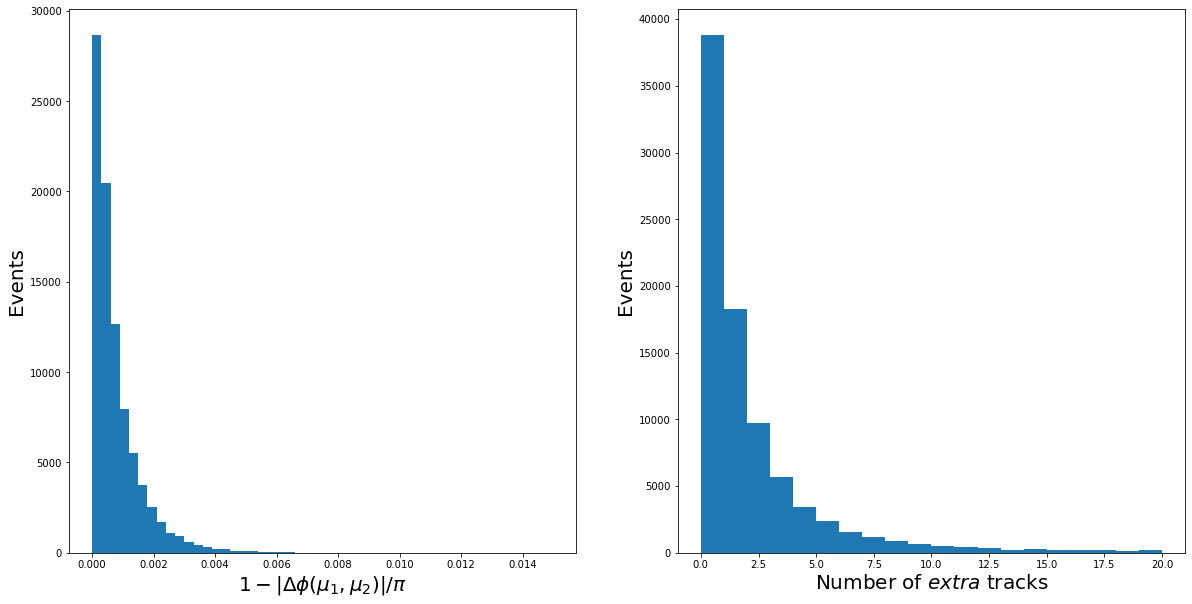

In [14]:
df_signal_events = df_signal.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_signal_events = df_signal_events[ ~df_signal_events.index.duplicated(keep='first') ]

msk_invmass = ( df_signal_events["InvMass"] >= 110. )
df_signal_events = df_signal_events[msk_invmass]

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( df_signal_events["Acopl"], bins=50, range=(0.,0.015) )
axes[0].set_ylabel( "Events", fontsize=20 )
axes[0].set_xlabel( r"$1 - \vert\Delta\phi(\mu_1,\mu_2)\vert/\pi$", fontsize=20 )
axes[1].hist( df_signal_events["ExtraPfCands"], bins=20, range=(0,20) )
axes[1].set_ylabel( "Events", fontsize=20 )
axes[1].set_xlabel( r"Number of $\it{extra}$ tracks", fontsize=20 )

Back to PPS information. We can look at the same distributions that we did for data.

Text(0, 0.5, 'Y (mm)')

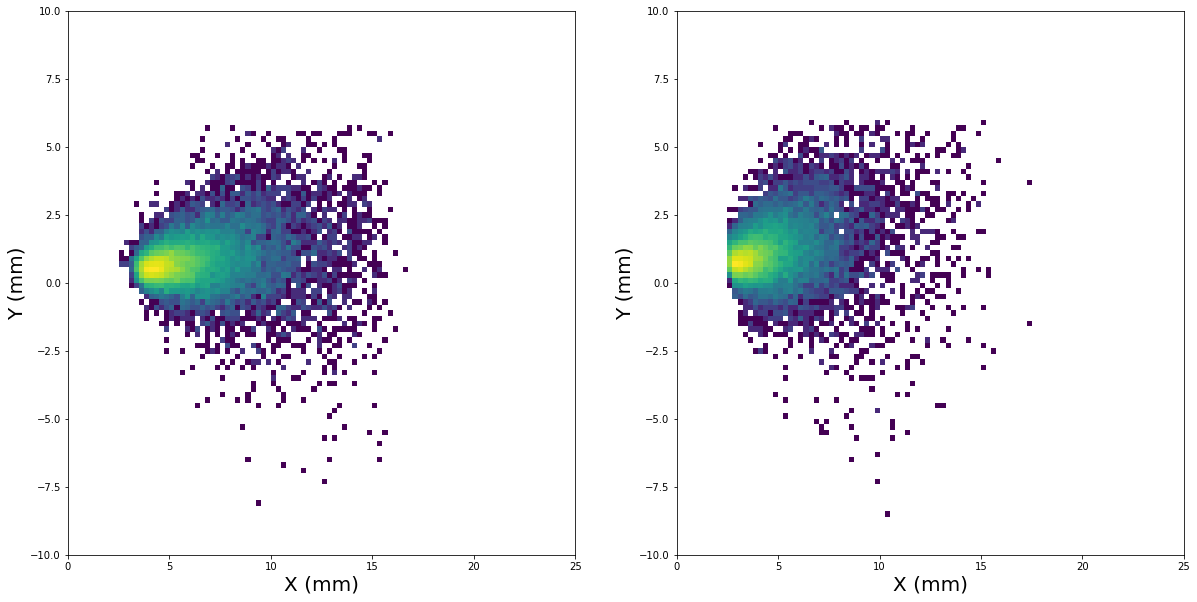

In [15]:
#some cuts to ensure PPS acceptance and "nice" signal candidates
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <=1 )

msk_protons_1 = None
msk_protons_2 = None

# Multi-RP
msk_protons_1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
msk_protons_2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )
    
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_signal[ "TrackX1" ][ msk_protons_1 ], df_signal[ "TrackY1" ][ msk_protons_1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_signal[ "TrackX1" ][ msk_protons_2 ], df_signal[ "TrackY1" ][ msk_protons_2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

We can translate the invariant mass of the two muons into a value of $\xi$. You could use the equation, but for convenience, this is already done for you and included in the signal file. It is the columns called `XiMuMuPlus` and `XiMuMuMinus`. Check the correlation between those and the proton $\xi$ on each arm of PPS.

Number of protons: 16514, 15465


Text(0, 0.5, '$\\xi_{\\mu\\mu}$')

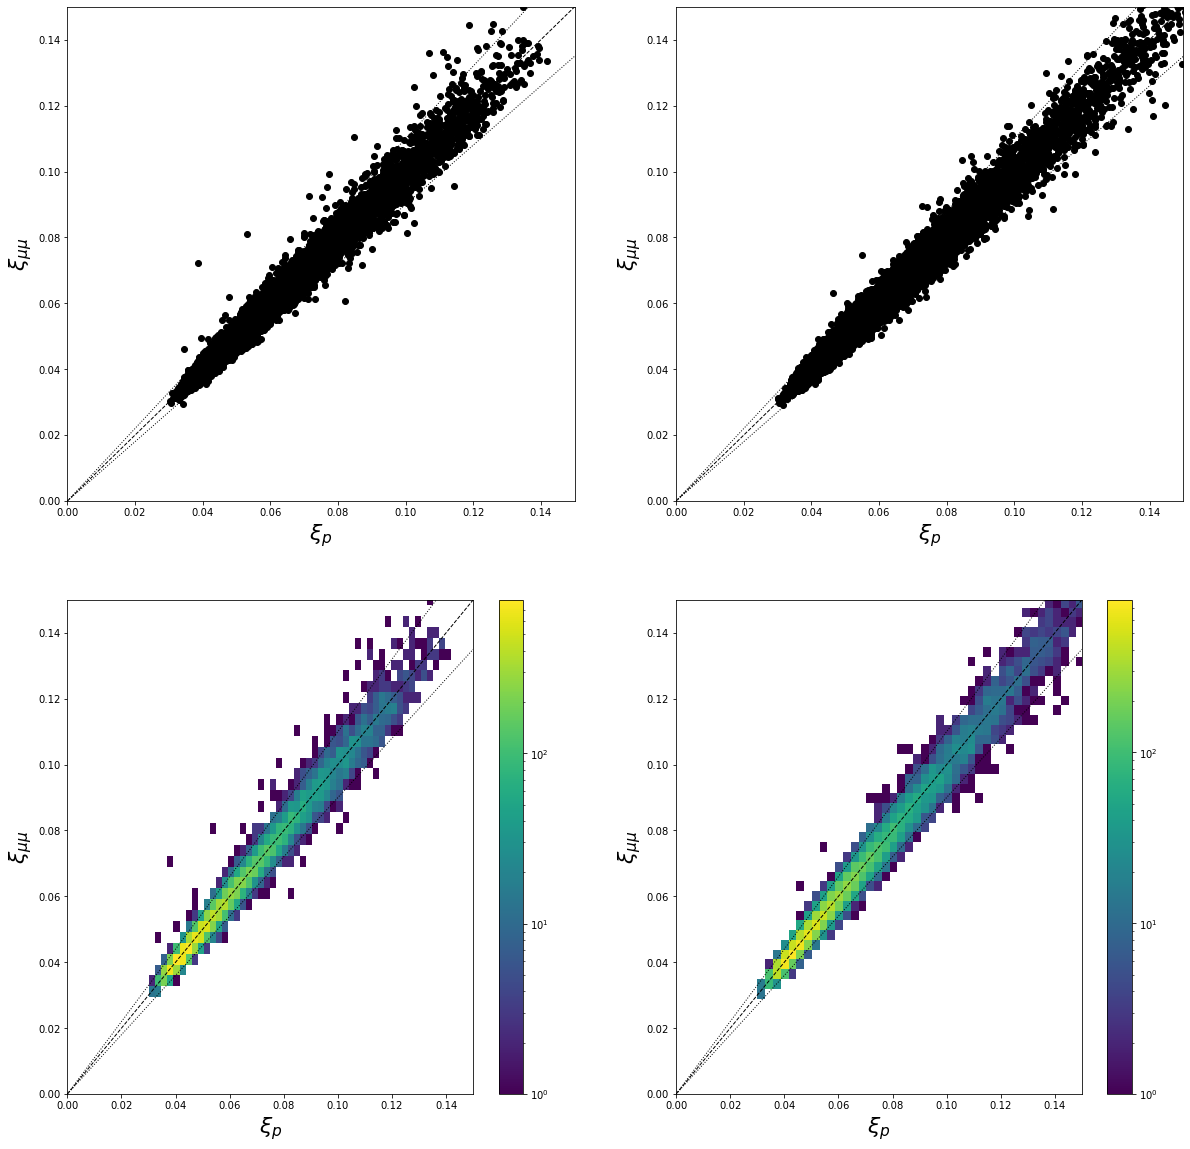

In [16]:
print ( "Number of protons: {}, {}".format( len( df_signal[ "Xi" ][ msk_protons_1 ] ), len( df_signal[ "Xi" ][ msk_protons_2 ] ) ) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_signal[ "Xi" ][ msk_protons_1 ], df_signal[ "XiMuMuPlus" ][ msk_protons_1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,0].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[0,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
#axes[0,0].set_xlabel( r"$\xi_p$", fontsize=22, ha='right', x=1.0 )
#axes[0,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22, ha='right', y=1.0 )
axes[0,1].plot( df_signal[ "Xi" ][ msk_protons_2 ], df_signal[ "XiMuMuMinus" ][ msk_protons_2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
axes[0,1].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[0,1].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
counts, xedges, yedges, im = axes[1,0].hist2d( df_signal[ "Xi" ][ msk_protons_1 ], df_signal[ "XiMuMuPlus" ][ msk_protons_1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
axes[1,0].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[1,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
counts, xedges, yedges, im = axes[1,1].hist2d( df_signal[ "Xi" ][ msk_protons_2 ], df_signal[ "XiMuMuMinus" ][ msk_protons_2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)
axes[1,1].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[1,1].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )

Notice the very large correlation. For the background, originating mostly from inclusive dilepton events matched randomly with protons from pileup, we do not expect any correlation. Therefore, this can help us separate the signal from the background. Let's go back to the data and select potential signal candidates.

In [17]:
#Filter the data
msk_excl = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

#MultiRP
msk_protons_1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
msk_protons_2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

print ( "Number of protons: {}, {}".format( len( df_data[ "Xi" ][ msk_protons_1 ] ), len( df_data[ "Xi" ][ msk_protons_2 ] ) ) )

Number of protons: 52, 85


Text(0, 0.5, '$\\xi_{\\mu\\mu}$')

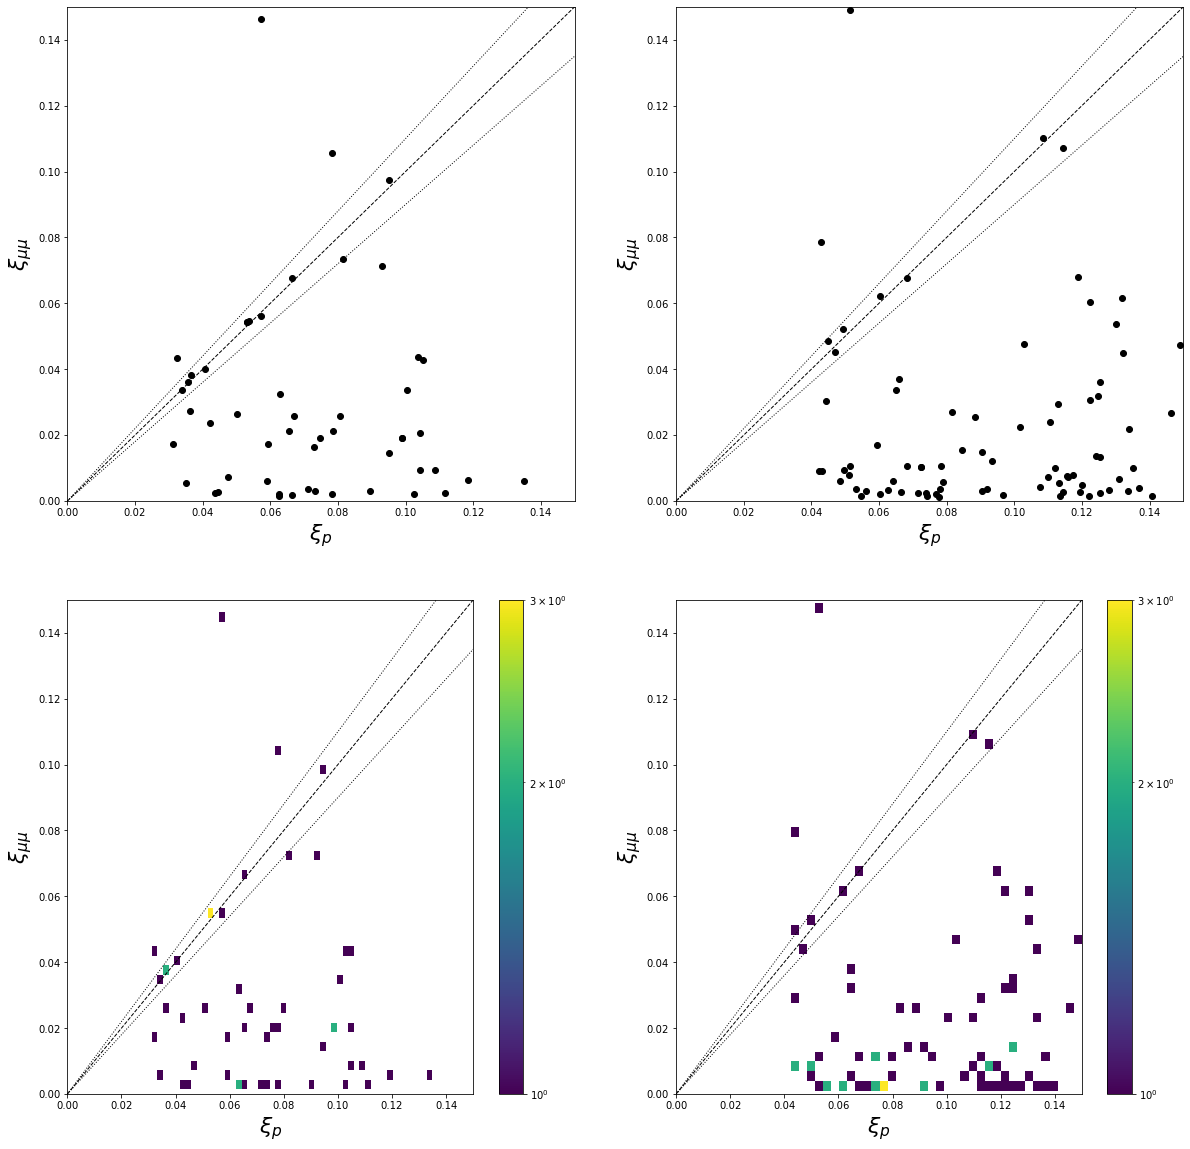

In [18]:
fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_data[ "Xi" ][ msk_protons_1 ], df_data[ "XiMuMuPlus" ][ msk_protons_1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,0].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[0,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
axes[0,1].plot( df_data[ "Xi" ][ msk_protons_2 ], df_data[ "XiMuMuMinus" ][ msk_protons_2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
axes[0,1].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[0,1].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
counts, xedges, yedges, im = axes[1,0].hist2d( df_data[ "Xi" ][ msk_protons_1 ], df_data[ "XiMuMuPlus" ][ msk_protons_1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
axes[1,0].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[1,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
counts, xedges, yedges, im = axes[1,1].hist2d( df_data[ "Xi" ][ msk_protons_2 ], df_data[ "XiMuMuMinus" ][ msk_protons_2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)
axes[1,1].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[1,1].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )

The events lying in the diagonals are our signal candidates (it does not mean they are actually signal, of course!). Let's select them.

[0 0 0 2 1 0 0 1 0 0 1 1 1 0 2 1 0 2 1 0 3 1 0 2 4 7 2 0 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
[0 0 2 1 0 1 2 2 0 0 3 0 3 0 2 1 0 1 0 3 1 2 1 0 3 4 0 1 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
y max. = 12.291502622129181


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

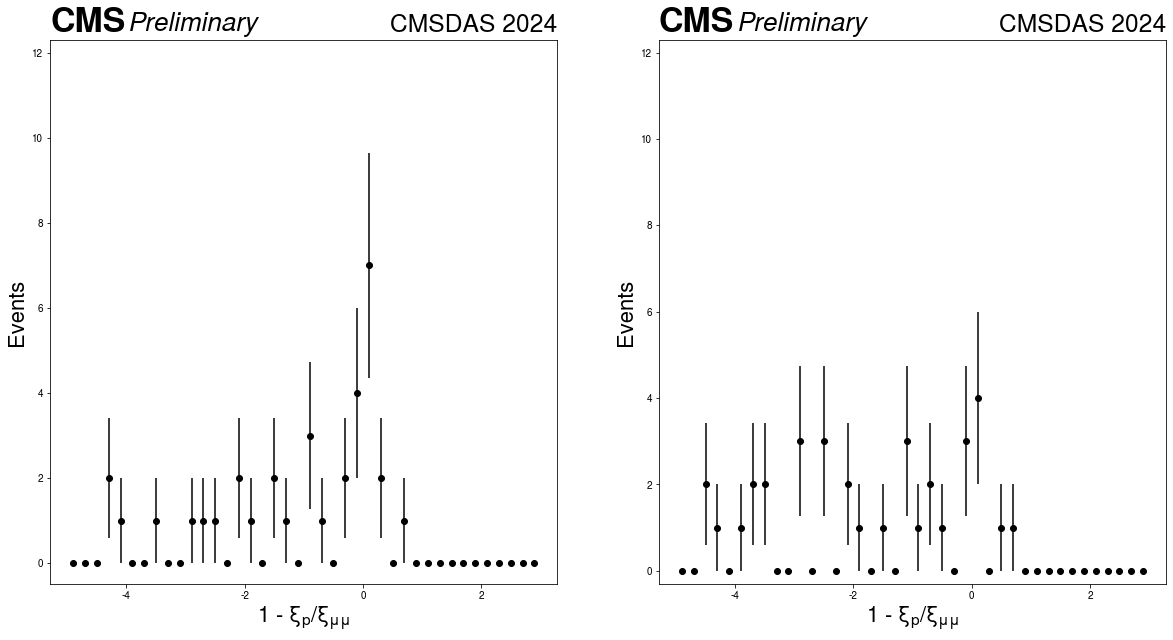

In [19]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 40
range_ = (-5.,3.)

msk_excl = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

msk_protons_1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
msk_protons_2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )
    
vals_1 = ( 1. - df_data[ "Xi" ][ msk_protons_1 ] / df_data[ "XiMuMuPlus" ][ msk_protons_1 ] )
counts_1, bin_edges_1 = np.histogram( vals_1, bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
print ( counts_1, bin_edges_1 )

bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='ko')

vals_2 = ( 1. - df_data[ "Xi" ][ msk_protons_2 ] / df_data[ "XiMuMuMinus" ][ msk_protons_2 ] )
counts_2, bin_edges_2 = np.histogram( vals_2, bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
print ( counts_2, bin_edges_2 )

bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='ko')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

axes[0].set_ylim( top=y_max )
axes[0].set_xlabel( r"1 - $\xi_p / \xi_{\mu\mu}$", fontsize=22 )
axes[0].set_ylabel( "Events", fontsize=22 )
axes[1].set_ylim( top=y_max )
axes[1].set_xlabel( r"1 - $\xi_p / \xi_{\mu\mu}$", fontsize=22 )
axes[1].set_ylabel( "Events", fontsize=22 )


plt.style.use(mplhep.style.CMS)
plt.sca( axes[0] )
mplhep.cms.label(llabel="Preliminary", rlabel="CMSDAS 2024")
plt.sca( axes[1] )
mplhep.cms.label(llabel="Preliminary", rlabel="CMSDAS 2024")

### Plot proton variables

5785      0.066331
39811     0.053652
45170     0.040781
936       0.057313
93817     0.081479
157144    0.095002
197500    0.035533
13880     0.053052
27904     0.036581
108797    0.033968
276753    0.053052
Name: Xi, dtype: float32
101961    0.047040
47139     0.114364
102511    0.108525
183292    0.049287
254521    0.060402
347199    0.044985
398981    0.068187
Name: Xi, dtype: float32
y max. = 9.47213595499958
5785      0.000026
39811     0.000088
45170    -0.000064
936       0.000047
93817    -0.000030
157144    0.000017
197500    0.000017
13880    -0.000006
27904    -0.000037
108797    0.000101
276753   -0.000006
Name: ThX, dtype: float32
101961    0.000113
47139     0.000029
102511   -0.000069
183292    0.000063
254521   -0.000008
347199    0.000013
398981    0.000080
Name: ThX, dtype: float32
y max. = 9.47213595499958
5785     -1.711910e-05
39811     7.711315e-07
45170    -5.318766e-05
936       3.860024e-06
93817    -1.272517e-05
157144   -3.580272e-05
197500   -5.277169e-05
1

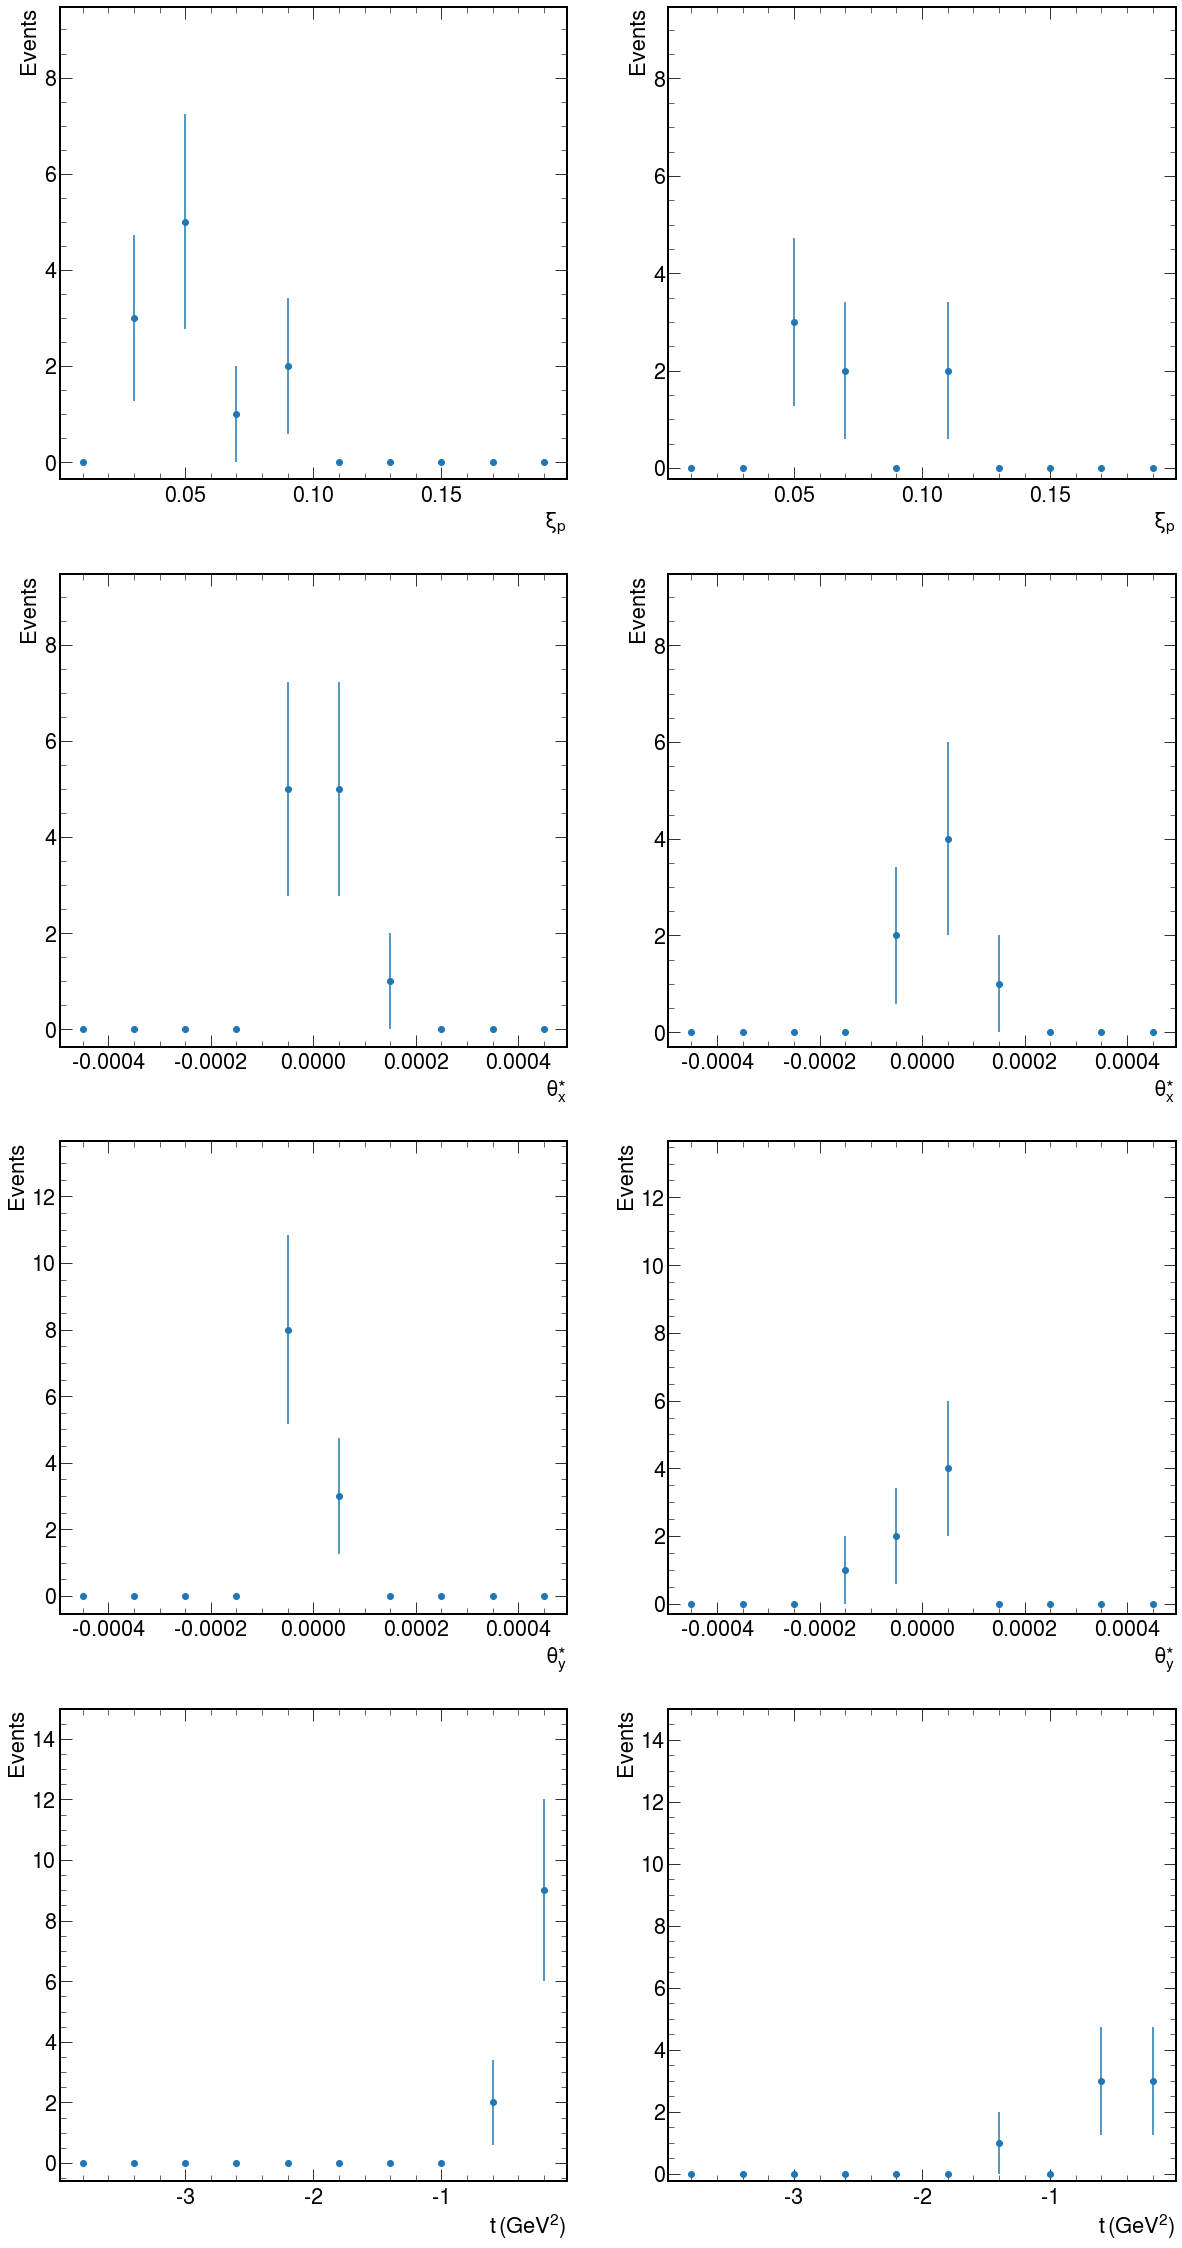

In [20]:
msk1_data_sel = ( vals_1 >= -0.20 ) & ( vals_1 <= +0.20 )
msk2_data_sel = ( vals_2 >= -0.20 ) & ( vals_2 <= +0.20 )

vars_ = {
    "Xi": { "var" : "Xi", "bins" : 10, "range" : (0.,0.2), "xlabel" : r"$\xi_p$" },
    "ThX": { "var" : "ThX", "bins" : 10, "range" : (-0.0005,0.0005), "xlabel" : r"$\theta_x^{\ast}$" },
    "ThY": { "var" : "ThY", "bins" : 10, "range" : (-0.0005,0.0005), "xlabel" : r"$\theta_y^{\ast}$" },
    "T": { "var" : "T", "bins" : 10, "range" : (-4.,0.), "xlabel" : r"$t\,(\mathrm{GeV}^2)$" }
    }

fig, axes = plt.subplots( len( vars_ ), 2, figsize=( 20, 10*len( vars_ ) ) )

row_ = 0
for key_ in vars_:

    var_ = vars_[ key_ ][ "var" ]
    bins_ = vars_[ key_ ][ "bins" ]
    range_ = vars_[ key_ ][ "range" ]
    xlabel_ = vars_[ key_ ][ "xlabel" ]
    
    print ( df_data[ var_ ][ msk_protons_1 ][ msk1_data_sel ] )

    counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk_protons_1 ][ msk1_data_sel ], bins=bins_, range=range_ )
    errors_1 = np.sqrt( counts_1 )
    bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
    axes[ row_, 0 ].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

    print ( df_data[ var_ ][ msk_protons_2 ][ msk2_data_sel ] )

    counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk_protons_2 ][ msk2_data_sel ], bins=bins_, range=range_ )
    errors_2 = np.sqrt( counts_2 )
    bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
    axes[ row_, 1 ].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

    idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
    y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
    print ( "y max. = {}".format(y_max) )

    axes[ row_, 0 ].set_ylim( top=y_max )
    axes[ row_, 0 ].set_xlabel( xlabel_, fontsize=22 )
    axes[ row_, 0 ].set_ylabel( "Events", fontsize=22 )
    axes[ row_, 1 ].set_ylim( top=y_max )
    axes[ row_, 1 ].set_xlabel( xlabel_, fontsize=22 )
    axes[ row_, 1 ].set_ylabel( "Events", fontsize=22 )
    
    row_ += 1

Congratulations, you have reached the end of the exercise. If you still have time left, you can try adding the signal simulation to the data histogram. Ask your facilitators for help if needed. Would you know where to find the expected cross section? How about the published [exclusive dilepton observation paper](https://arxiv.org/abs/1803.04496)?

**Thank you for participating!**